In [56]:
# === IMPORT LIBRARY === #
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [57]:
# === LOAD DATA === #
df = pd.read_csv("asset/HR_comma_sep.csv")

In [69]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [58]:
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


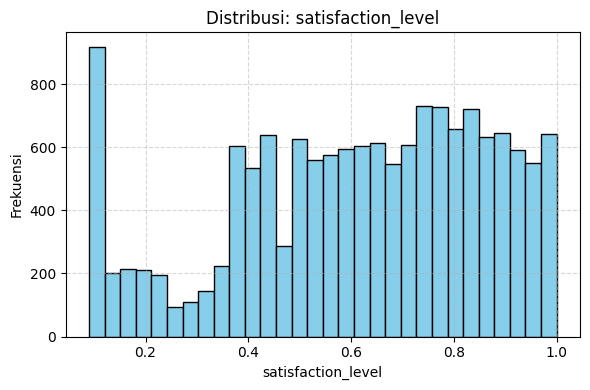

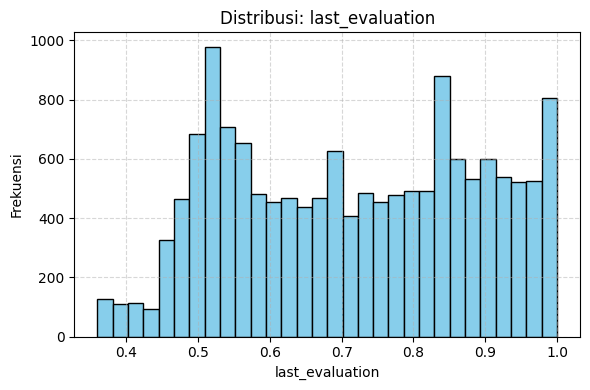

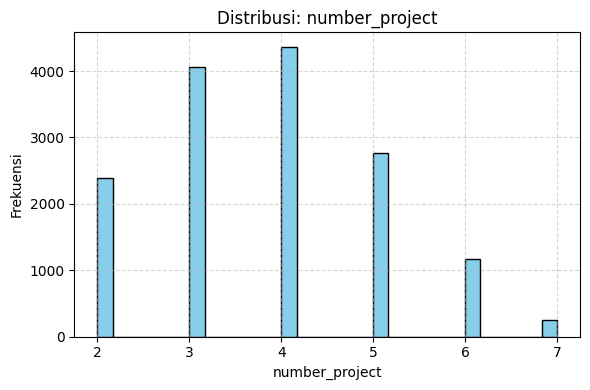

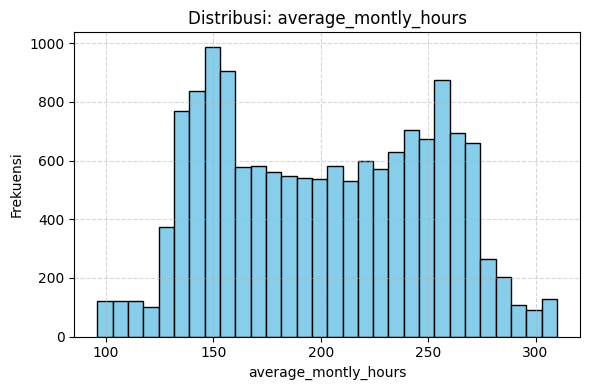

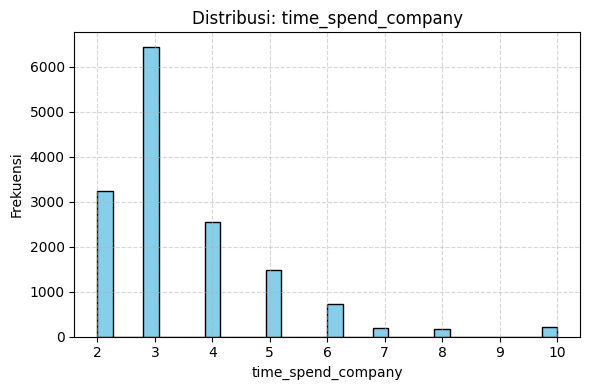

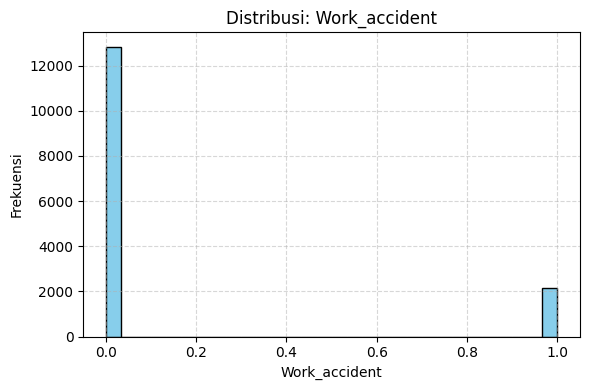

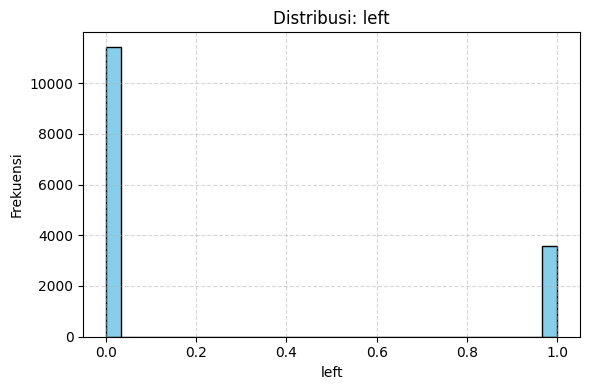

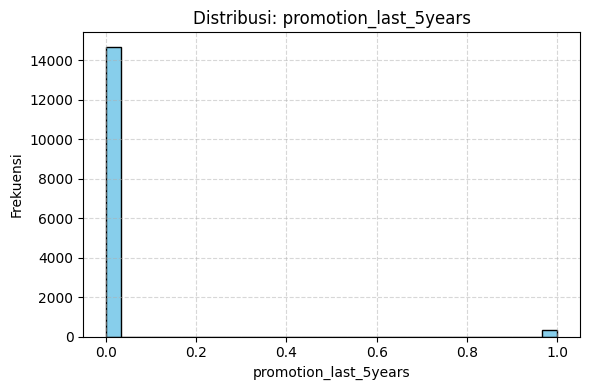

In [59]:
# === Distribusi fitur numerik === #
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


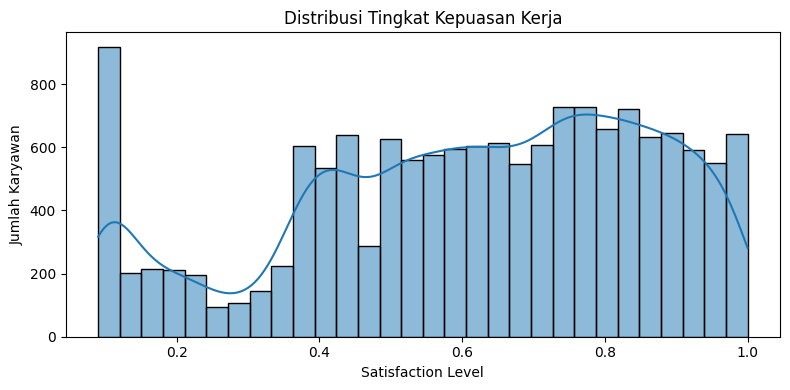

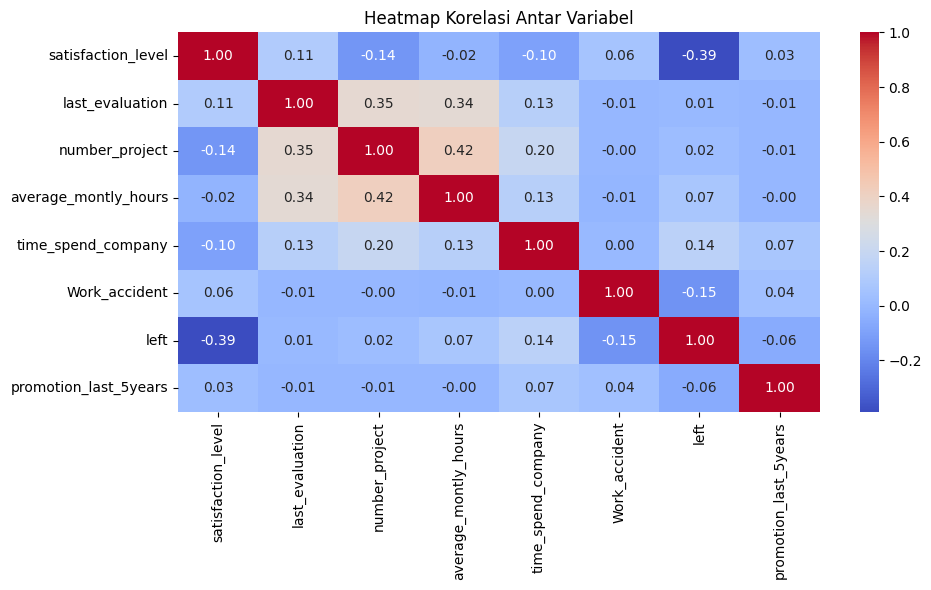

In [60]:
# === DISTRIBUSI DAN HEATMAP KORELASI === #
plt.figure(figsize=(8, 4))
sns.histplot(df['satisfaction_level'], kde=True, bins=30)
plt.title("Distribusi Tingkat Kepuasan Kerja")
plt.xlabel("Satisfaction Level")
plt.ylabel("Jumlah Karyawan")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.tight_layout()
plt.show()

In [61]:
# === LABEL ENCODING === #
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])  
df['sales'] = le.fit_transform(df['sales'])    

In [62]:
# === FEATURE SCALING & SPLIT DATA === #
X = df.drop('left', axis=1)
y = df['left']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
# === RANDOM FOREST === #
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.9883333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [64]:
# === ADABOOST === #
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

print("\n=== AdaBoost ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ab)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ab))



=== AdaBoost ===
Accuracy: 0.937
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2294
           1       0.90      0.82      0.86       706

    accuracy                           0.94      3000
   macro avg       0.92      0.90      0.91      3000
weighted avg       0.94      0.94      0.94      3000



In [65]:
# === CONFUSION MATRIX === #
print("\nConfusion Matrix - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))

print("\nConfusion Matrix - AdaBoost")
print(confusion_matrix(y_test, y_pred_ab))


Confusion Matrix - Random Forest
[[2285    9]
 [  26  680]]

Confusion Matrix - AdaBoost
[[2230   64]
 [ 125  581]]


In [66]:
# === CONFUSION MATRIX - VISUALISASI === #
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Turnover", "Turnover"],
                yticklabels=["No Turnover", "Turnover"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.tight_layout()
    plt.show()

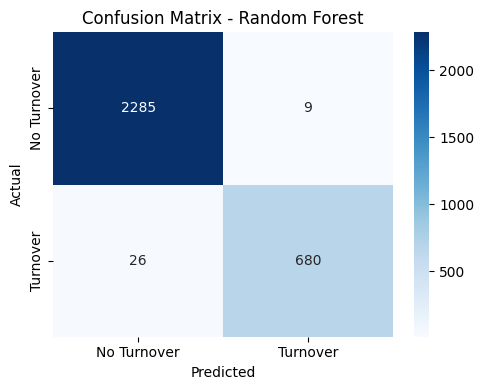

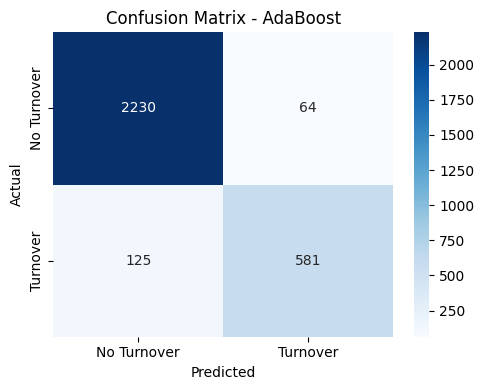

In [67]:
# === Visualisasi Confusion Matrix Random Forest & AdaBoost === #
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
plot_conf_matrix(y_test, y_pred_ab, "AdaBoost")

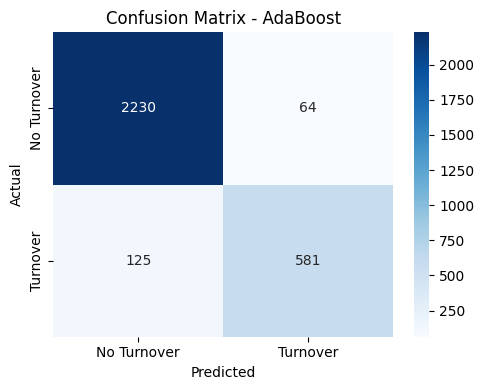

In [68]:
# Visualisasi untuk AdaBoost
plot_conf_matrix(y_test, y_pred_ab, "AdaBoost")